In [1]:
library(Seurat)

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

Attaching SeuratObject



In [3]:
folder_path <- "/data2/ZenNa/DFU_Project/Data/SubSet_Diabetic"
csv_files <- list.files(path = folder_path, pattern = "\\.csv$", full.names = TRUE)

In [4]:
# Init seurat object list
seurat_object_list <- list()

In [ ]:
# Reading data and creating seurat_object

In [5]:
for (csv_file in csv_files) {
  dataset <- read.csv(csv_file)
  sample_name <- tools::file_path_sans_ext(basename(csv_file))  # Extract sample name
  seurat_obj <- CreateSeuratObject(counts = dataset, project = sample_name, min.cells = 3, min.features = 200)
  seurat_object_list[[sample_name]] <- seurat_obj
}

In [6]:
bm280k.list <- seurat_object_list

In [7]:
bm280k.list <- lapply(X = bm280k.list, FUN = function(x) {
    x <- NormalizeData(x, verbose = FALSE)
    x <- FindVariableFeatures(x, verbose = FALSE)
})

# Next, select features for downstream integration, and run PCA on each object in the list, which is required for running the alternative reciprocal PCA workflow.

In [8]:
features <- SelectIntegrationFeatures(object.list = bm280k.list)
bm280k.list <- lapply(X = bm280k.list, FUN = function(x) {
    x <- ScaleData(x, features = features, verbose = FALSE)
    x <- RunPCA(x, features = features, verbose = FALSE)
})

In [9]:
anchors <- FindIntegrationAnchors(object.list = bm280k.list, reference = c(1, 2), reduction = "rpca",
    dims = 1:50)
bm280k.integrated <- IntegrateData(anchorset = anchors, dims = 1:50)

Warning message in CheckDuplicateCellNames(object.list = object.list):
“Some cell names are duplicated across objects provided. Renaming to enforce unique cell names.”
Computing 2000 integration features

Scaling features for provided objects

Computing within dataset neighborhoods

Finding anchors between all query and reference datasets

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 443 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 826 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 777 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 1248 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 469 anchors

Projecting new data onto SVD

Projecting new data onto SV

In [10]:
bm280k.integrated <- ScaleData(bm280k.integrated, verbose = FALSE)
bm280k.integrated <- RunPCA(bm280k.integrated, verbose = FALSE)
bm280k.integrated <- RunUMAP(bm280k.integrated, dims = 1:50)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
09:17:37 UMAP embedding parameters a = 0.9922 b = 1.112

09:17:37 Read 12723 rows and found 50 numeric columns

09:17:37 Using Annoy for neighbor search, n_neighbors = 30

09:17:37 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

09:17:38 Writing NN index file to temp file /tmp/RtmpfecZFy/file17007b526b3a03

09:17:38 Searching Annoy index using 1 thread, search_k = 3000

09:17:41 Annoy recall = 100%

09:17:41 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbor

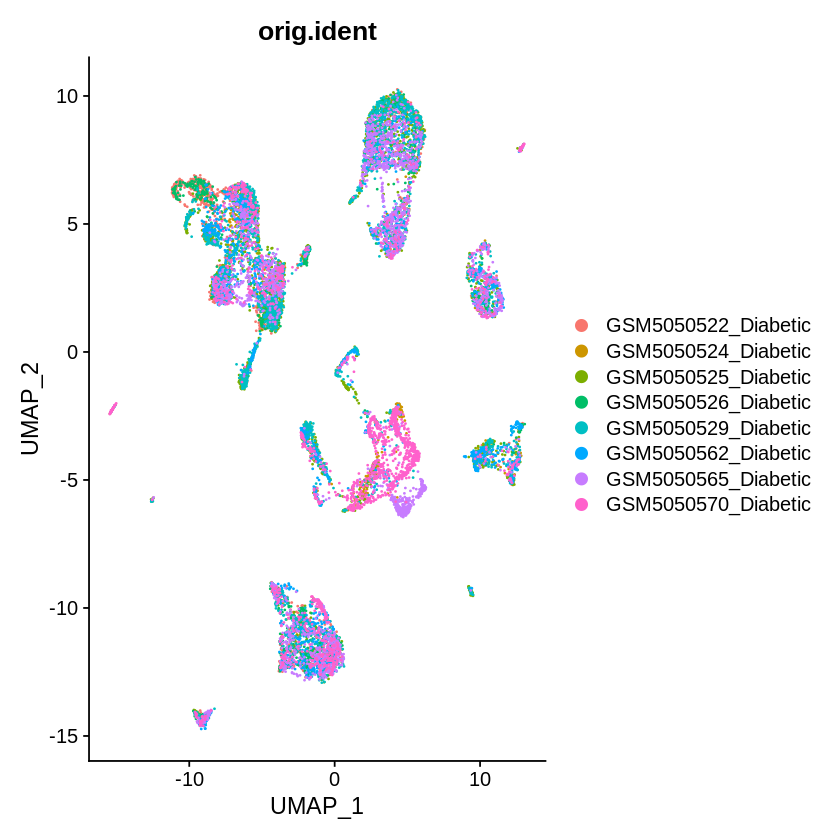

In [11]:
DimPlot(bm280k.integrated, group.by = "orig.ident")

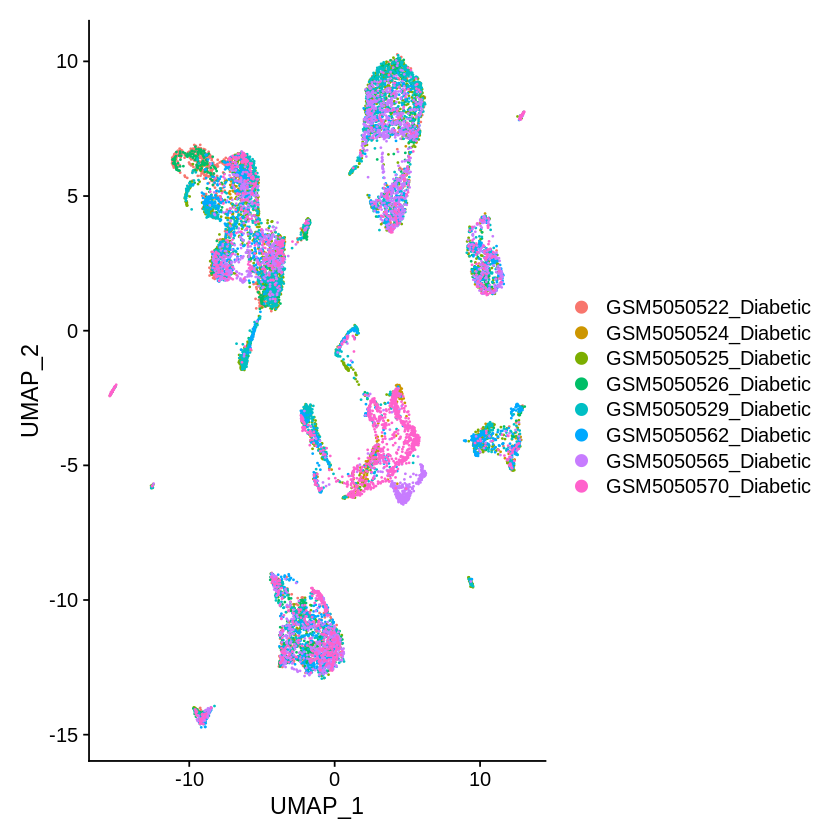

In [15]:
DimPlot(bm280k.integrated, reduction = 'umap')

In [18]:
bm280k.integrated <- FindNeighbors(bm280k.integrated, dims = 1:50)


Computing nearest neighbor graph

Computing SNN



In [21]:
bm280k.integrated <- FindClusters(bm280k.integrated, resolution = 0.2)  # You can adjust the resolution parameter


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 12723
Number of edges: 498228

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9668
Number of communities: 16
Elapsed time: 1 seconds


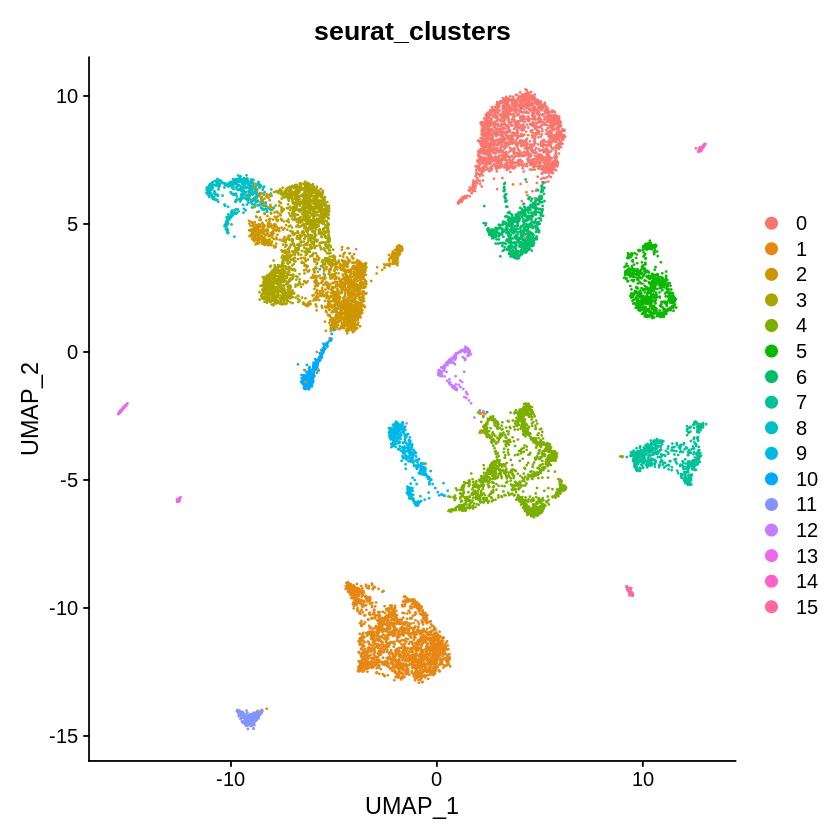

In [22]:
DimPlot(bm280k.integrated, group.by = 'seurat_clusters')
